<a href="https://colab.research.google.com/github/prajeeta15/ANOVA/blob/main/Malicious_Server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sp.stats.f.ppf(.95, 3, 328)

2.6321415117354894

In [5]:
df = pd.read_excel('/anova_train.xlsx')
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
X1_mean = df['X_1'].mean()
X14_mean = df['X_14'].mean()
grand_mean = (X1_mean+X14_mean)/2

SST = len(df['X_1'])*(X1_mean-grand_mean)**2\
      +len(df['X_14'])*(X14_mean-grand_mean)**2
MST = SST/2

SSE = (len(df['X_1'])-1)*df['X_1'].var(ddof=1)\
      +(len(df['X_14'])-1)*df['X_14'].var(ddof=1)
n = len(df['X_1']) + len(df['X_14'])
k = 2
MSE = SSE/(n-k)

F = MST/MSE
print('F-statistic: {}'.format(F))
print('p-value: {}'.format(1 - sp.stats.f.cdf(F, 2, n-k)))

F-statistic: 33122.71812086038
p-value: 1.1102230246251565e-16


In [7]:
print('X_1: {}'.format(df['X_1'].var(ddof=1)))
print('x_14: {}'.format(df['X_14'].var(ddof=1)))

X_1: 2.072845187874259
x_14: 1874.6579450081333


Mounted at /content/drive


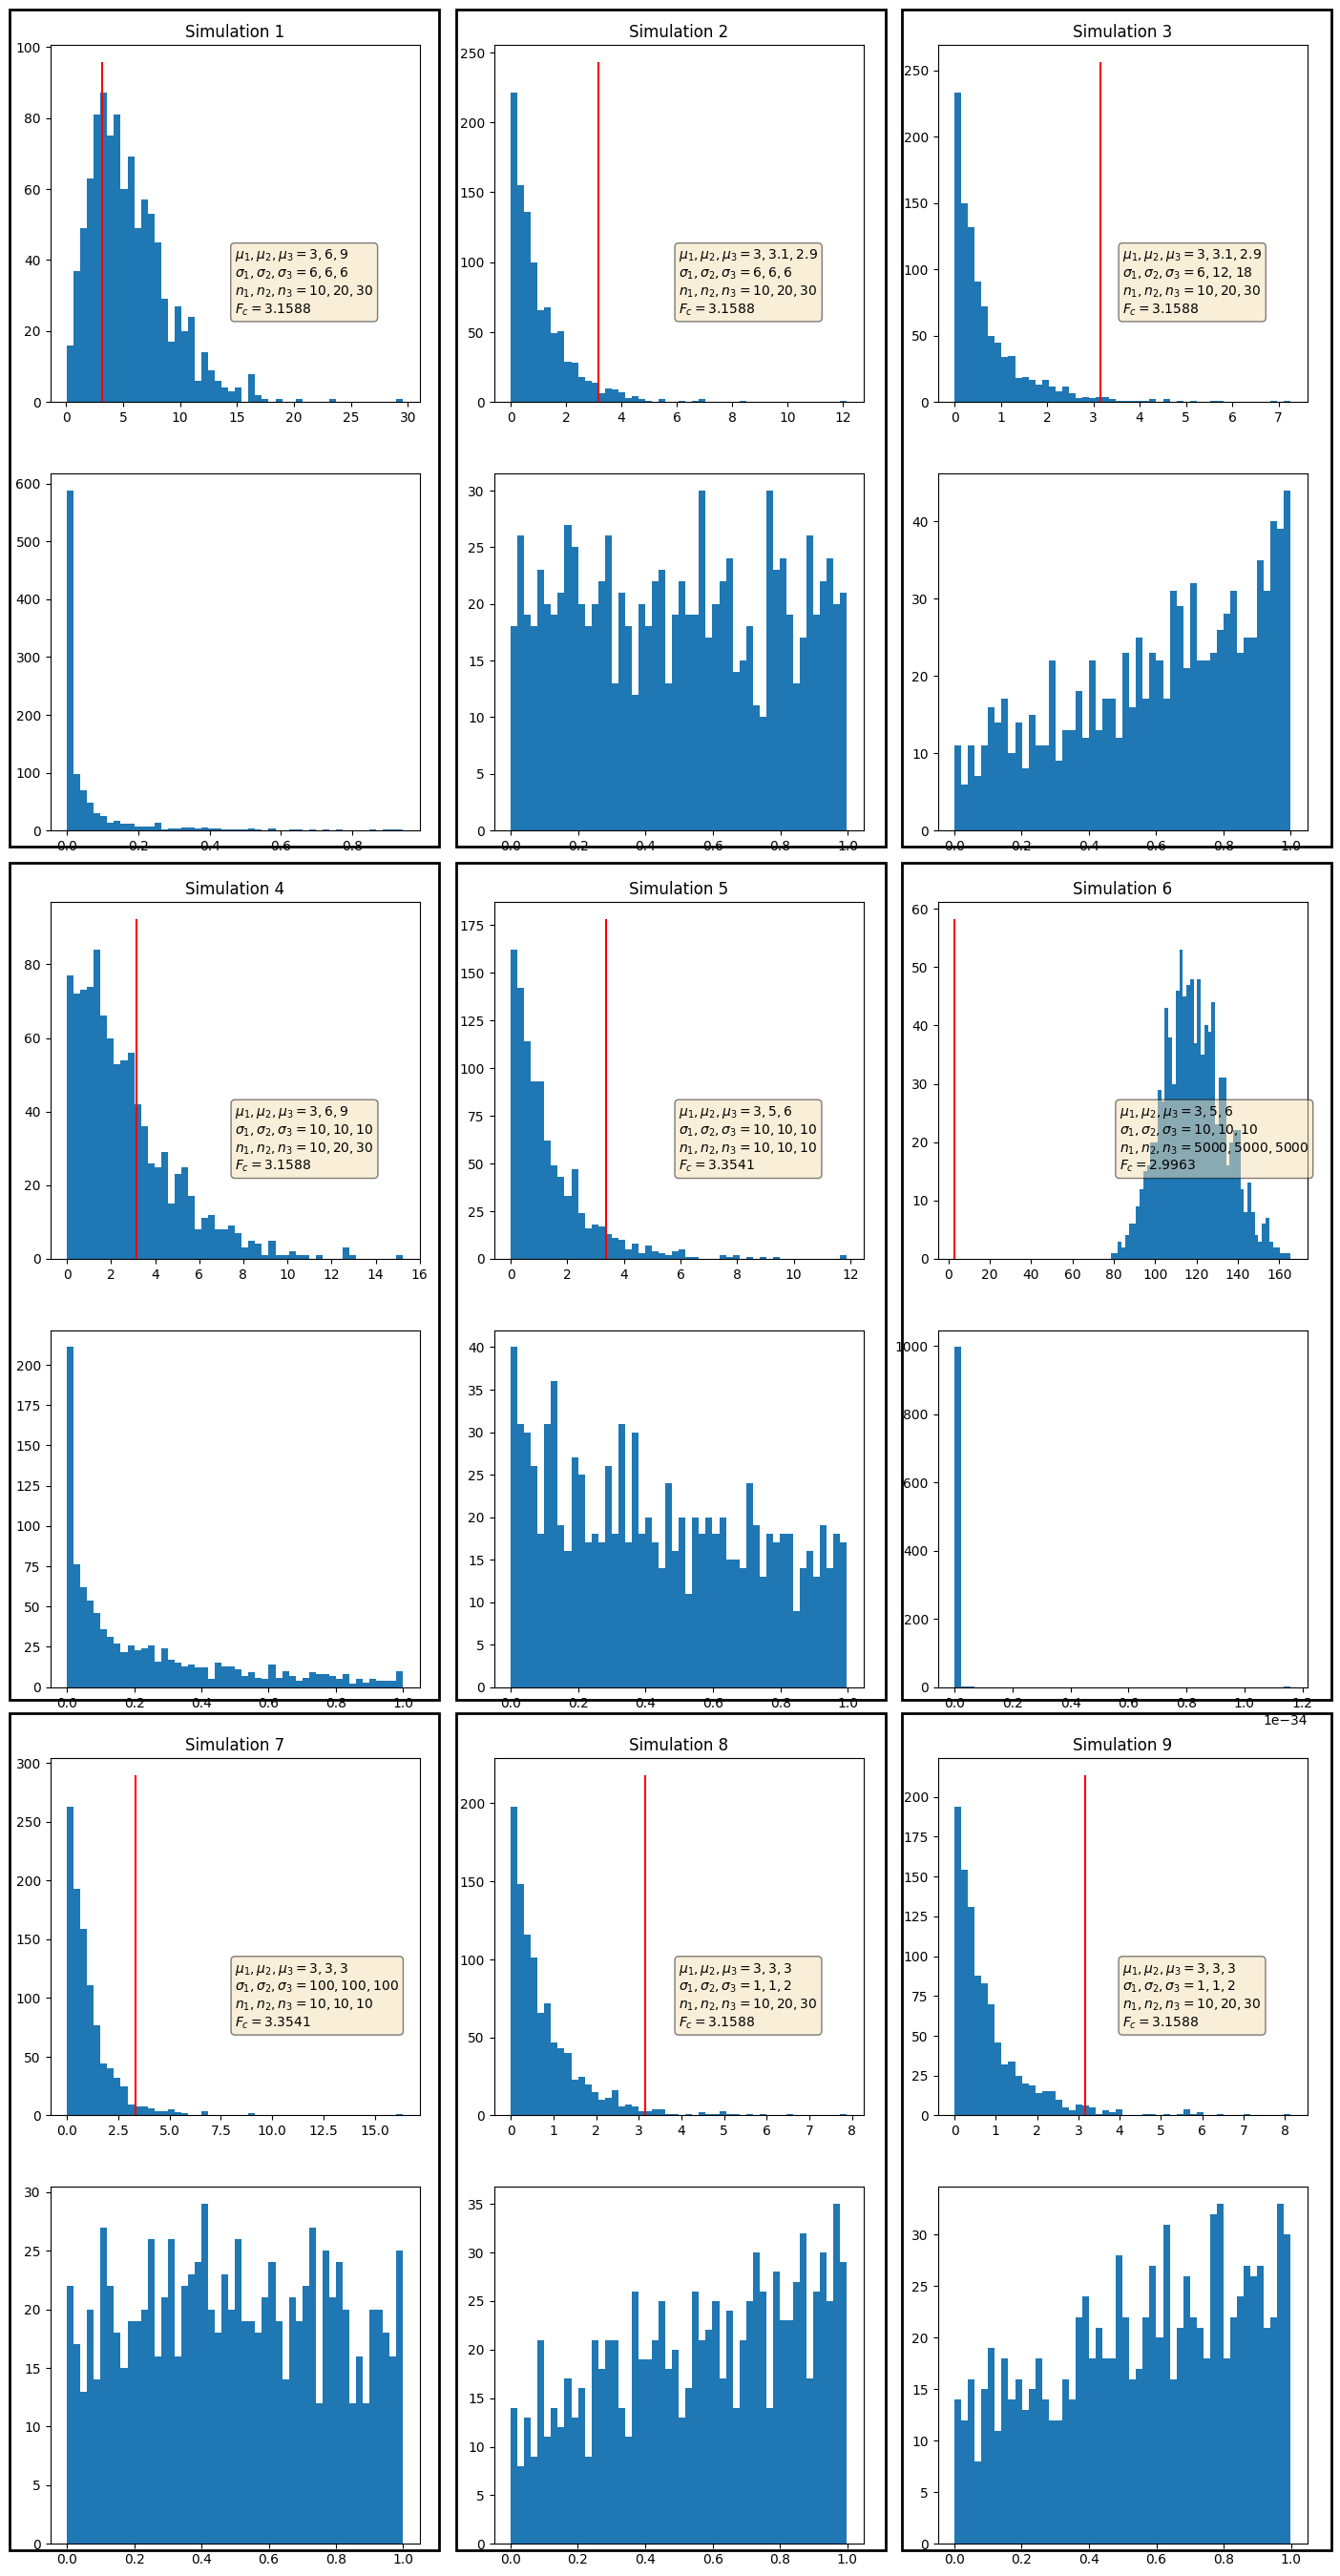

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import sys
# Append the directory to the python path using sys
sys.path.append('/content/drive/MyDrive')
# Import the module
import plot_material
plot_material.anova_plot()

In [10]:
import pandas as pd
df2 = pd.read_excel('/anova_train.xlsx')

In [11]:
df2.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [13]:
X14_mean = df2['X_14'].mean()
X1_mean = df2['X_1'].mean()
X15_mean = df2['X_15'].mean()
grand_mean = (X14_mean+X1_mean+X15_mean)/3

SSE = (len(df2['X_1'])-1)*df2['X_1'].var(ddof=1)\
    +(len(df2['X_14'])-1)*df2['X_14'].var(ddof=1)\
    +(len(df2['X_15'])-1)*df2['X_15'].var(ddof=1)

n = len(df2['X_1']) + len(df2['X_14']) + len(df2['X_15'])
k = 3
MSE = SSE/(n-k)

In [21]:
import scipy.stats as stats
import numpy as np

def lsd(sig_level, MSE, n1, n2):
    t = stats.t.ppf(1-sig_level/2, n1+n2-2)
    return t*np.sqrt(MSE*(1/n1+1/n2))

In [22]:

X1X14 = X1_mean-X14_mean
X1X15 = X1_mean-X15_mean
X14X15 = X14_mean-X15_mean
X1X14_lsd_low = X1X14 - lsd(.05, MSE, len(df2['X_1']), len(df2['X_14']))
X1X14_lsd_high = X1X14 + lsd(.05, MSE, len(df2['X_1']), len(df2['X_14']))

X1X15_lsd_low = X1X15 - lsd(.05, MSE, len(df2['X_1']), len(df2['X_15']))
X1X15_lsd_high = X1X15 + lsd(.05, MSE, len(df2['X_1']), len(df2['X_15']))

X14X15_lsd_low = X14X15 - lsd(.05, MSE, len(df2['X_14']), len(df2['X_15']))
X14X15_lsd_high = X14X15 + lsd(.05, MSE, len(df2['X_14']), len(df2['X_15']))

print('Comparison, Point Estimate, Lower Bound, Upper Bound')
print('X_1 - X_14   : {:.4f},    {:.4f},     {:.4f}'.format(X1X14, X1X14_lsd_low, X1X14_lsd_high))
print('X_1 - X_15  : {:.4f},    {:.4f},     {:.4f}'.format(X1X15, X1X15_lsd_low , X1X15_lsd_high))
print('X_14 - X_15 : {:.4f},    {:.4f},     {:.4f}'.format(X14X15, X14X15_lsd_low , X14X15_lsd_high))


Comparison, Point Estimate, Lower Bound, Upper Bound
X_1 - X_14   : -72.1905,    -72.6477,     -71.7333
X_1 - X_15  : -32.9810,    -33.4382,     -32.5238
X_14 - X_15 : 39.2095,    38.7523,     39.6667


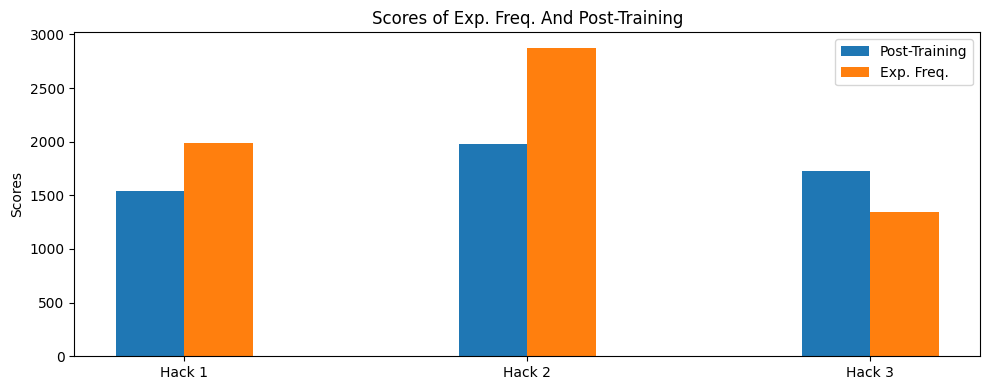

In [27]:
import matplotlib.pyplot as plt
labels = ['Hack 1', 'Hack 2', 'Hack 3']
post_training = np.array([1536, 1980, 1729])
exp_frequency = np.array([1986, 2875, 1345])

x = np.arange(len(labels))  # the label locations
width = .2  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 4))
rects1 = ax.bar(x - width/2, post_training, width, label='Post-Training')
rects2 = ax.bar(x + width/2, exp_frequency, width, label='Exp. Freq.')

ax.set_ylabel('Scores')
ax.set_title('Scores of Exp. Freq. And Post-Training')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [28]:
sum((post_training - exp_frequency)**2/exp_frequency)

490.21385128255963

In [29]:
stats.chi2.ppf(.90, 4)

7.779440339734858